In [ ]:
%matplotlib inline


# Decision boundary of semi-supervised classifiers versus SVM on the Iris dataset

A comparison for the decision boundaries generated on the iris dataset
by Label Spreading, Self-training and SVM.

This example demonstrates that Label Spreading and Self-training can learn
good boundaries even when small amounts of labeled data are available.

Note that Self-training with 100% of the data is omitted as it is functionally
identical to training the SVC on 100% of the data.


In [1]:
# Authors: Clay Woolam   <clay@woolam.org>
#          Oliver Rausch <rauscho@ethz.ch>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
%whos

Variable                 Type           Data/Info
-------------------------------------------------
LabelSpreading           ABCMeta        <class 'sklearn.semi_supe<...>pagation.LabelSpreading'>
SVC                      ABCMeta        <class 'sklearn.svm._classes.SVC'>
SelfTrainingClassifier   type           <class 'sklearn.semi_supe<...>.SelfTrainingClassifier'>
X                        ndarray        150x2: 300 elems, type `float64`, 2400 bytes
datasets                 module         <module 'sklearn.datasets<...>rn/datasets/__init__.py'>
h                        float          0.02
iris                     Bunch          {'data': array([[5.1, 3.5<...> 'sklearn.datasets.data'}
np                       module         <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                      module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rng                      RandomState    RandomState(MT19937)
y                        ndarray        150: 150 elems, ty

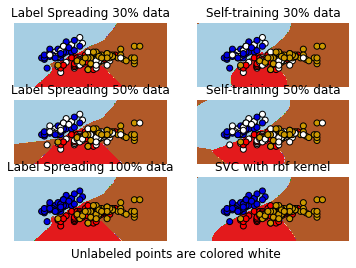

In [3]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()